# Populace vystavená lovu


In [1]:
import matplotlib.pyplot as plt        # knihovna pro statické grafy a grafy kreslit sem do zápisníku
%matplotlib inline               

import numpy                           # knihovna pro numerické výpočty
from scipy.integrate import solve_ivp  # řešení diferenciálních rovnic

Všeobecně příjímaným zakladním modelem pro růst populace v prostředí s omezenou nosnou kapacitou je rovnice
$$\frac{\mathrm dx}{\mathrm dt}=rx\left(1-\frac xK\right),$$
kde $r$ a $K$ jsou konstanty. Rychlost růstu je tedy úměrná velikosti populace a volnému místu v prostředí.
Podle velkosti koeficientů v této funkci dělíme živočichy na [r-stratégy](http://cs.wikipedia.org/wiki/%C5%BDivotn%C3%AD_strategie) a [K-stratégy](http://cs.wikipedia.org/wiki/%C5%BDivotn%C3%AD_strategie) a toto dělení odráží, jak se snaží druh vyrovnávat se změnami prostředí.

Pokud do tohoto modelu přidáme lov s konstantním výtěžkem $h$, modifikuje se rovnice na 
$$\frac{\mathrm dx}{\mathrm dt}=rx\left(1-\frac xK\right)-h.$$

Graficky představuje funkce $$ y=rx\left(1-\frac xK\right) $$ parabolu procházející počátkem a na ose $x$ bodem odpovídajícím nosné kapacitě $K$. Parabola je otočena vrcholem nahoru. Funkce $$y=h$$ představuje vodorovnou přímku, která se posunuje nahoru nebo dolů v závislosti na velikosti hodnoty $h$, tj. v závislosti na intenzitě lovu.

Pro posouzení existence a stability stacionárních bodů existují tři kvalitativně odlišné případy, buď je vodorovná přímka nad parabolou, nebo se jí dotýká ve vrcholu, nebo je protíná ve dvou průsečících. Prostřední případ je hraničním, kdy při zvyšování lovu dva stacionární stavy (dva průsečíky křivek) zaniknou a systém ztratí stabilitu (křivky nemají průsečík a stacionární bod neexistuje). 

Namodelujeme si vývoj populace pro několik strategií lovu (tj. několik hodnot parametru $h$).

Každé strategii lovu odpovídají tři obrázky. Na jednom jsou zakresleny funkce z pravé strany rovnice, parabola a vodorovná přímka. Na druhém grafu je tento obrázek jenom otočen tak, aby byla velikost populace na svislé ose. Podle těchto obrázků poznáme, kde je parabola numericky nad přímkou, tj. kde populace roste a kde klesá.

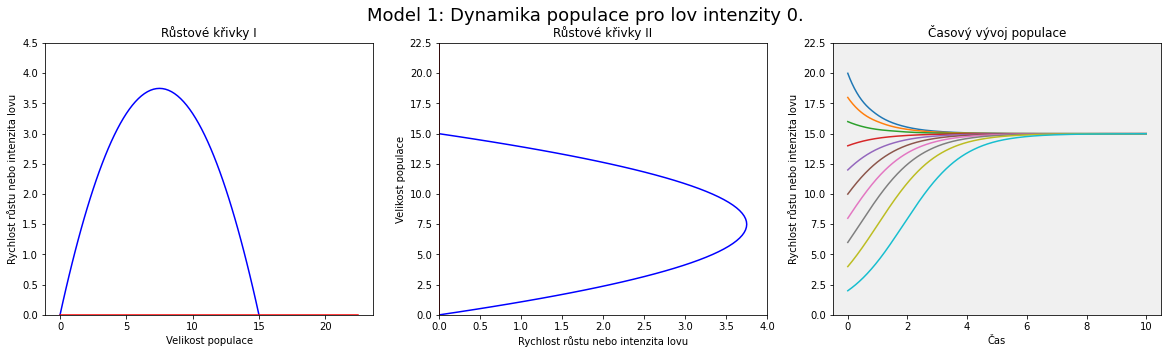

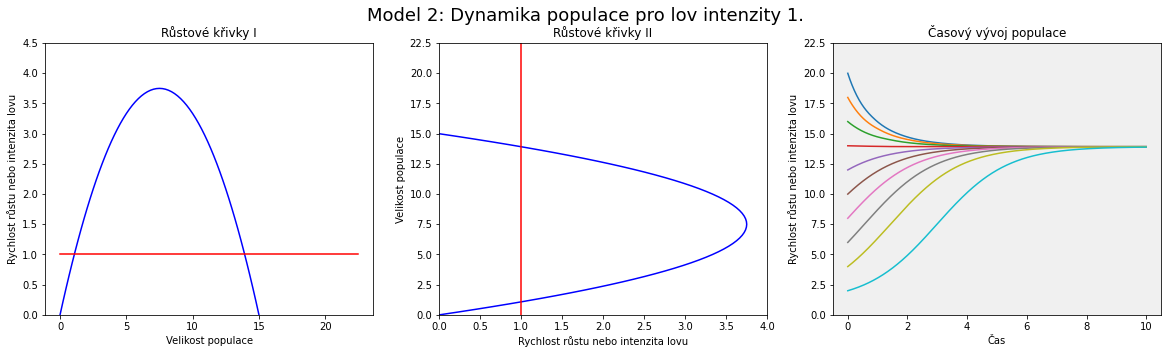

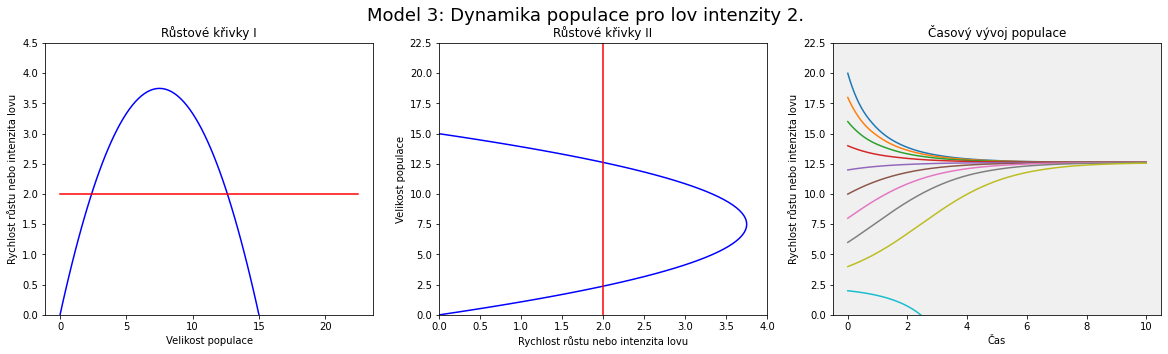

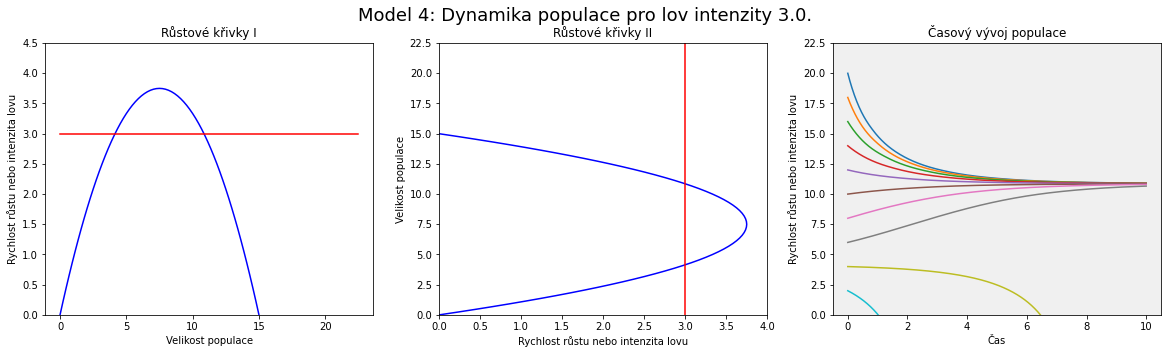

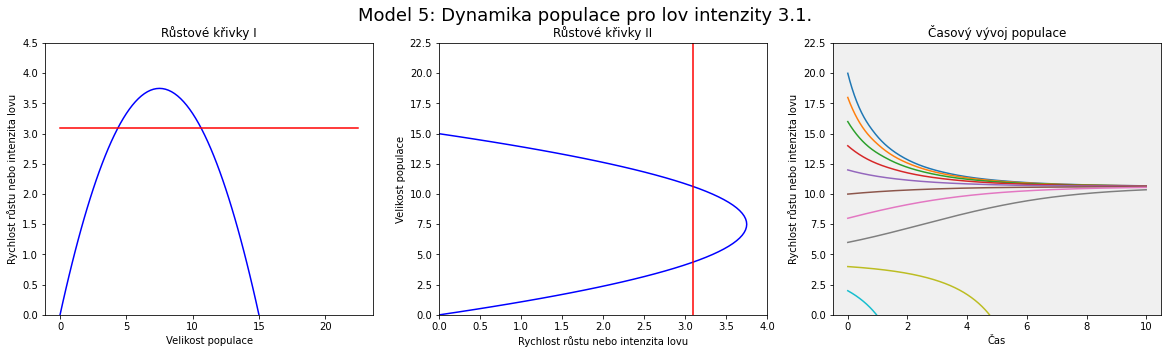

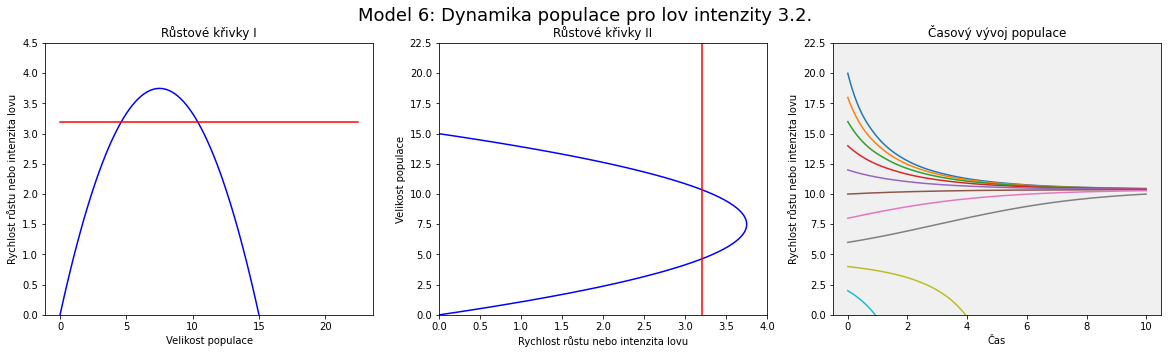

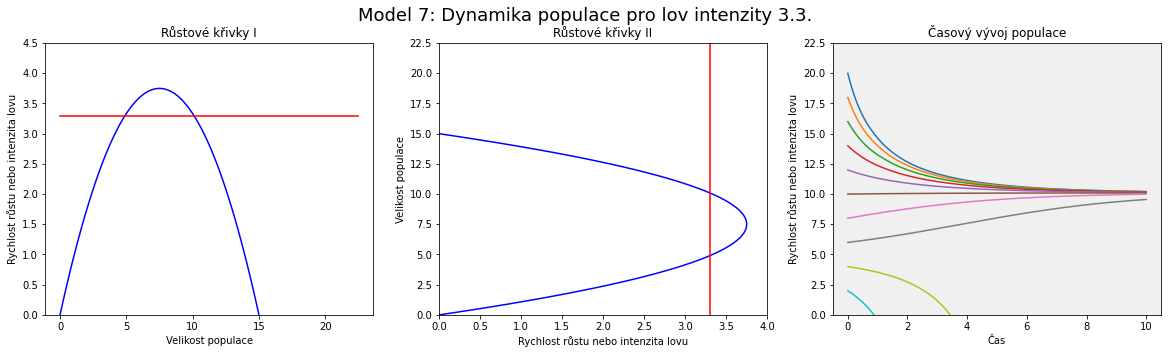

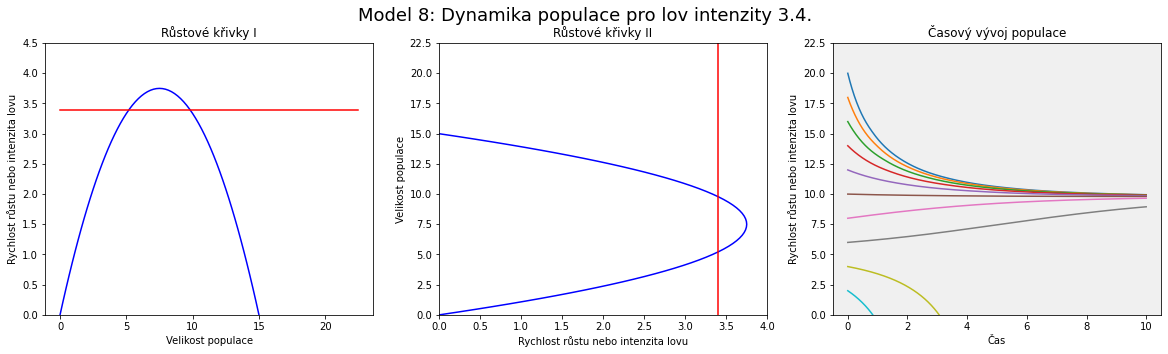

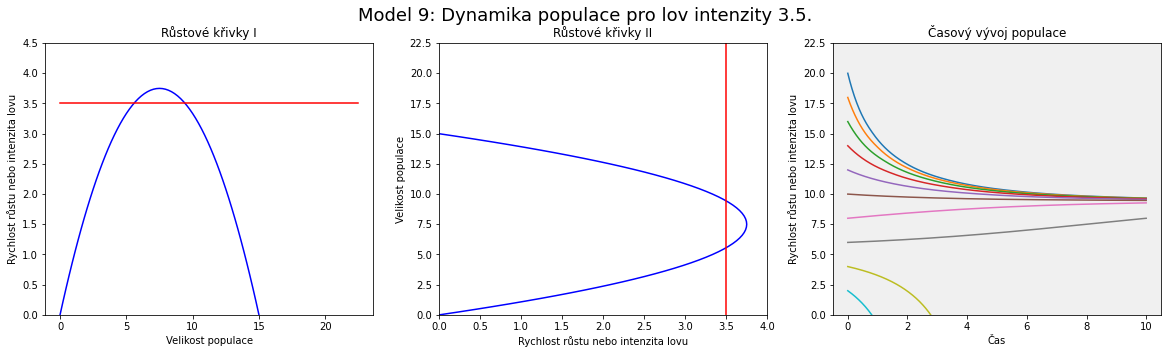

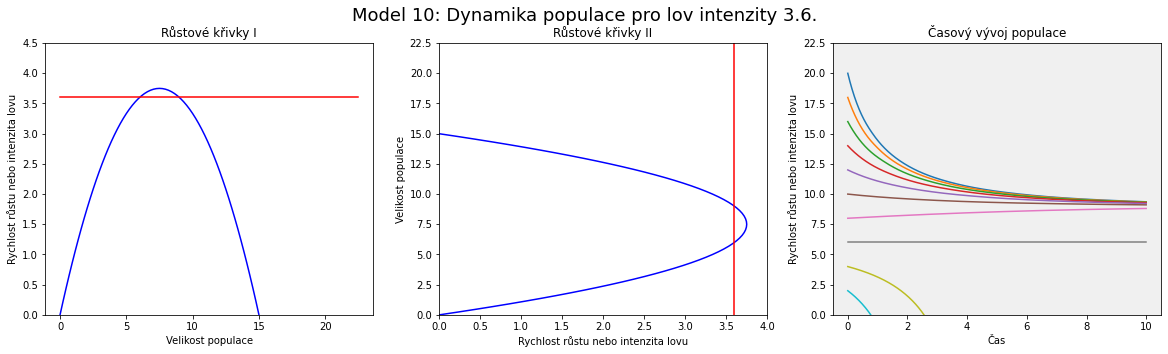

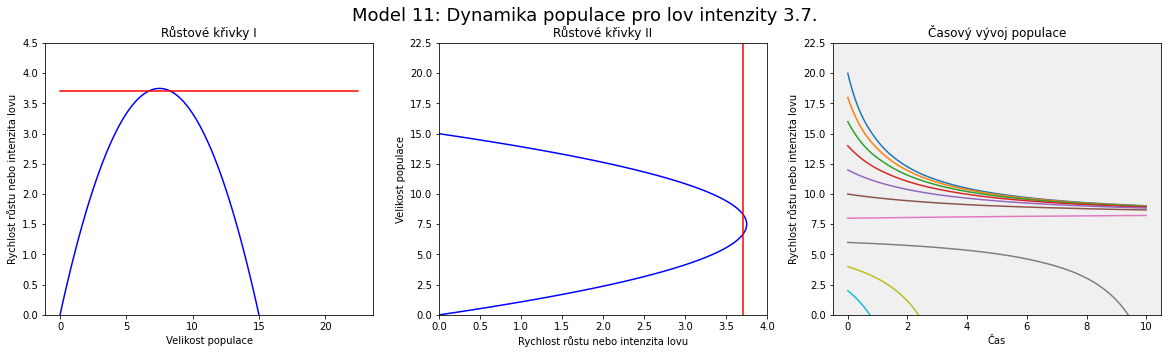

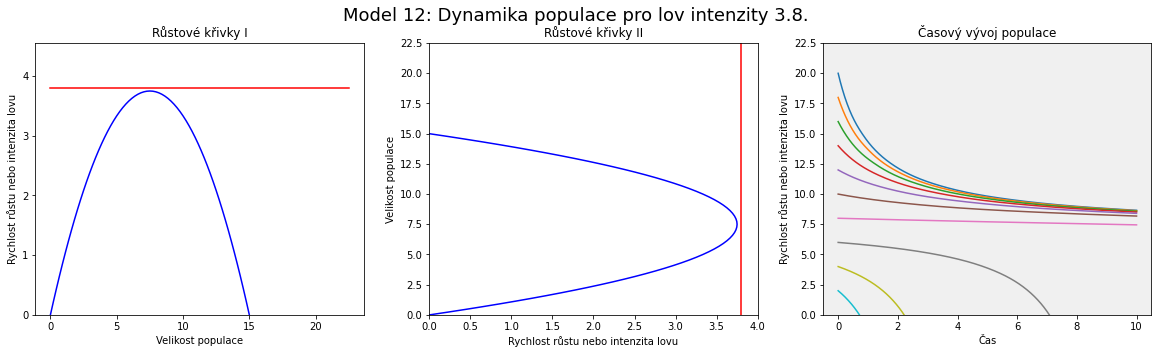

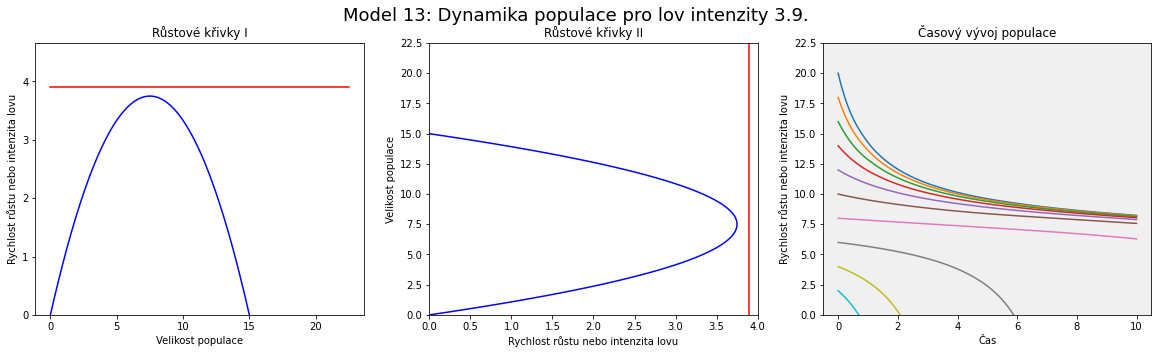

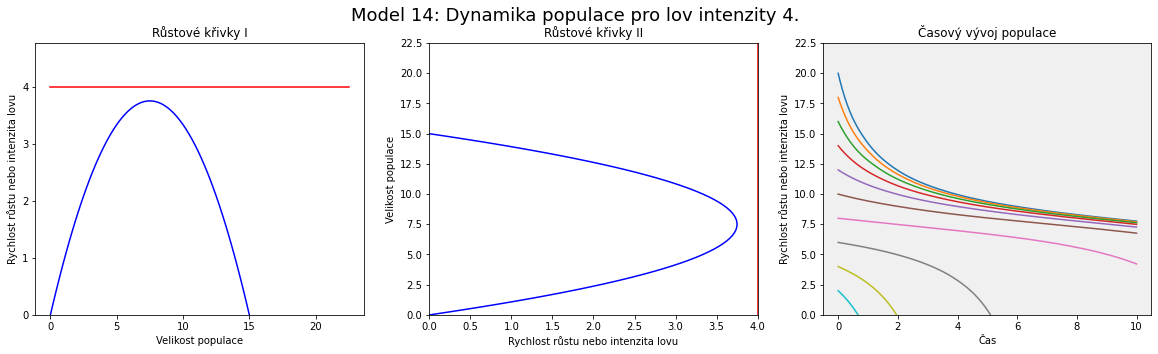

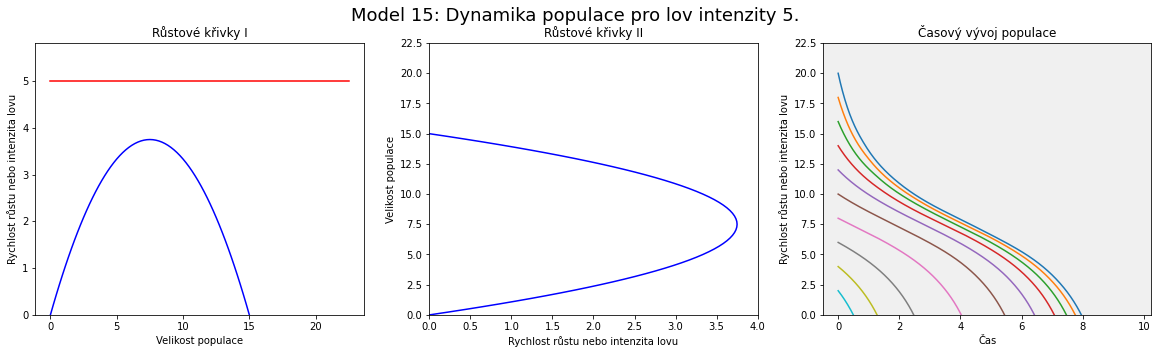

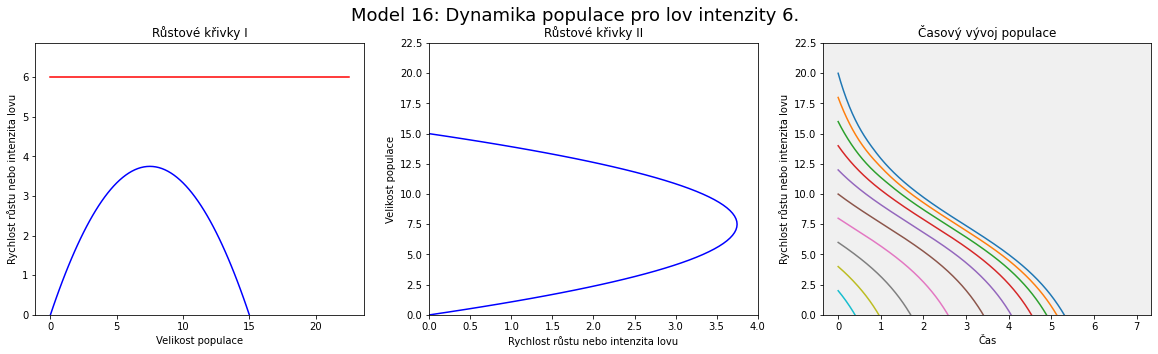

In [3]:
r, K = 1, 15  # Nastavení parametrů
ymax = 1.5*K
t = numpy.linspace(0, 10, 1000)    # interval pro kreslení funkcí času
x = numpy.linspace(0, ymax, 100)   # interval pro kreslení funkcí proměnné x

count=0                            # počítadlo obrázků

strategie_lovu = [0,1,2] + list(numpy.linspace(3,4,10, endpoint=False) ) + [4,5,6]  # seznam intenzit lovu, po celých číslech, mezi trojkou a čtyřkou po desetiných

for h in strategie_lovu:                                  # cyklus přes různé strategie lovu
    fig, axes = plt.subplots(1, 3, figsize=(20,5))        # inicializace a nastavení obrázku, kreslíme tři obrázky vedle sebe
    count = count + 1
    fig.suptitle('Model %s: Dynamika populace pro lov intenzity %s.'%(count,h), fontsize=18)
    

    ax = axes[0]                            # kreslíme do prvního obrázku
    ax.plot(x,r*x*(1-x/K),color='blue')     # parabola
    ax.plot([x[0],x[-1]],[h,h], color='red')# vodorovná přímka pomocí krajních bodů
    ax.set_ylim([0,None])                   # osa od nuly
    ax.set_title("Růstové křivky I")
    ax.set_xlabel("Velikost populace")
    ax.set_ylabel("Rychlost růstu nebo intenzita lovu")

    ax = axes[1]                            # kreslíme do druhého obrázku
    ax.set_ylim([0,ymax])                   # nastavení rozsahu pro svislou osu
    ax.set_xlim([0,4])                      # nastavení rozsahu pro vodorovnou osu
    ax.plot(r*x*(1-x/K),x, color='blue')    # nakreslení otočené paraboly
    ax.plot([h,h],[x[0],x[-1]], color='red')# svislá přímka pomocí dvou bodů
    ax.set_title("Růstové křivky II")
    ax.set_ylabel("Velikost populace")
    ax.set_xlabel("Rychlost růstu nebo intenzita lovu")


    ax = axes[2]                  # kreslíme do třetího obrázku
    ax.set_ylim(0,ymax)           # nastavení rozsahu pro svislou osu
    for i in range(20,0,-2):      # cyklus přes počáteční podmínky
        sol = solve_ivp(lambda t, x: r*x*(1-x/K)-h, [t[0], t[-1]], [i], t_eval=t)
        ax.plot(sol.t, sol.y[0])  # vykreslení řešení

    ax.set_facecolor('#f0f0f0') # šedé pozadí obrázku
    ax.set_title("Časový vývoj populace")
    ax.set_xlabel("Čas")
    ax.set_ylabel("Velikost populace")


None

Vidíme, že rostoucí intenzita lovu posouvá vodorovnou přímku výše. Dva stacionární body odpovídají po řadě nestabilnímu a stabilnímu stavu. 

* Pokud je velikost popualce dostatečně velká, je intenzita lovu trvale udržitelná a populace nevymře. 
* Pokud by  však velikost populace klesla pod hodnotu danou nižším stacionárním stavem, nestihne její růst dorovnat intezitu lovu a populace časem vyhyne. 
* Vzdálenost mezi touto hranicí pro vyhynutí a mezi stabilním stacionárním stavem odpovídajícím stacionárnímu bodu vpravo se zvyšováním intenzity lovu $h$ snižuje. Například model číslo 11 chrakterizuje ještě uržitelný stav, ale vzdálenost stabilního stavu (v jeho okolí je systém po většinu času) a nestabilního stavu (při poklesu pod tento stav populace vyhyne) je minimální. Vzhledem k tomu, že k výkyvům dochází v přírodě neustále a není možné je odfiltrovat, jedná se doslova o balancování na hraně propasti. Jakmile jednou populace zakolísá pod levý stacionární bod, začne vymírat. 
* Od jisté hodnoty lovu oba stacionární body zaniknou a situace je dlouhodobě neudržitelná, populace vyhyne. 